**Name :** Joseph Boweenraj A

**Department :** B.Tech - Artificial Intelligence & Data Science

**Year :** III - yr

**Title :** Bike Sharing Dataset

**Problem Statement :** The target of this dataset is to investigate and forecast hourly bike demand for a shared city-based bike system. Temporal, environmental, and user-centric features like season, weather, holiday status, and type of user (registered vs. casual) are presented in the data. Properly forecasting bike demand can aid bike allocation optimization, minimize operation expense, and maximize user satisfaction

**Objective :** The primary objective of this dataset is to forecast the number of bike rentals in a specific hour using temporal, weather, and holiday features. Through these patterns, stakeholders are able to make resource planning decisions, bike distribution, and infrastructure planning.


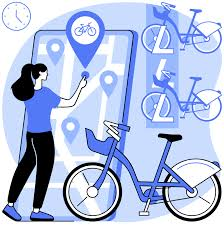

# **✈ IMPORTING LIBRARIES**

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [51]:
data= pd.read_csv("hour.csv")

In [52]:
df=pd.DataFrame(data)

In [53]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [55]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [56]:
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [57]:
df.duplicated().sum()

np.int64(0)

In [58]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [59]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [60]:
df.shape

(17379, 17)



```
# This is formatted as code
```

# ✈ **HANDLING OUTLIERS**

In [61]:
n_columns=df.select_dtypes(include=np.number).columns

In [62]:
n_columns

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

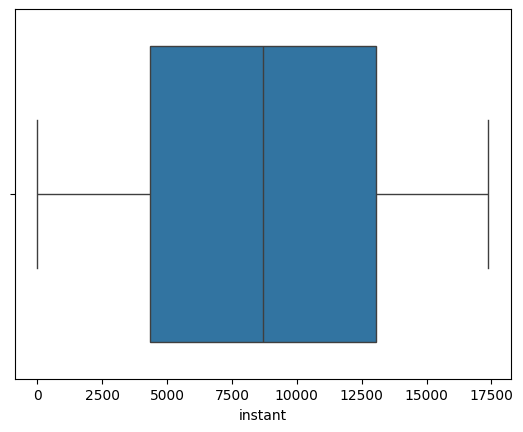

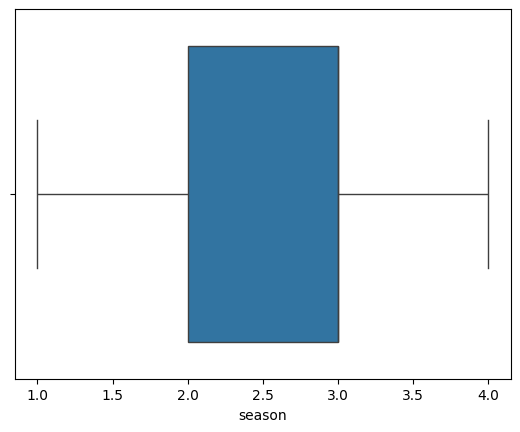

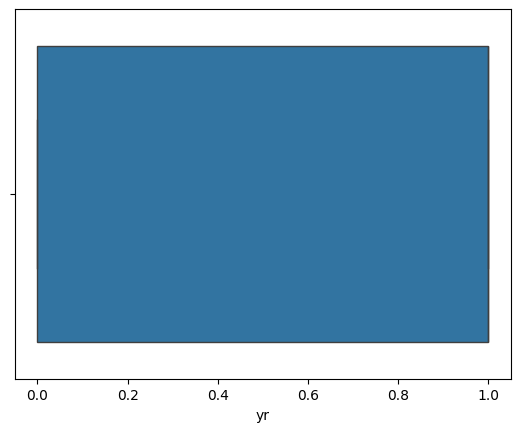

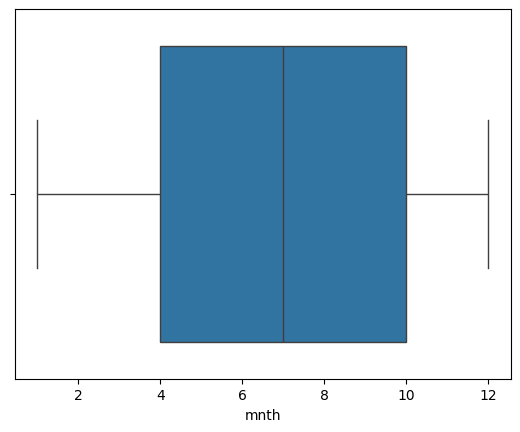

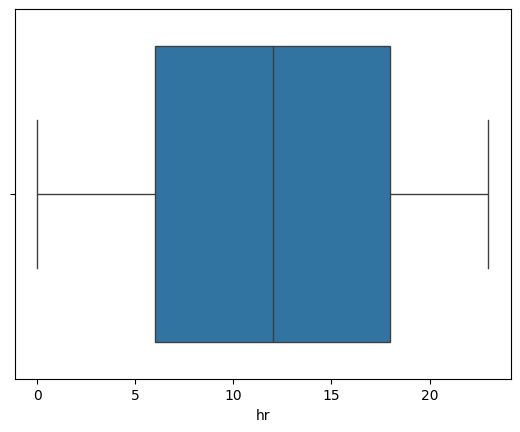

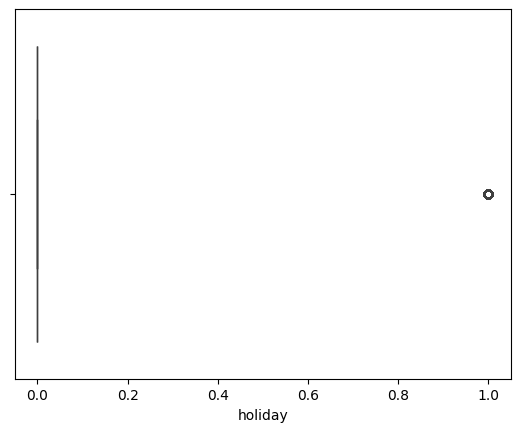

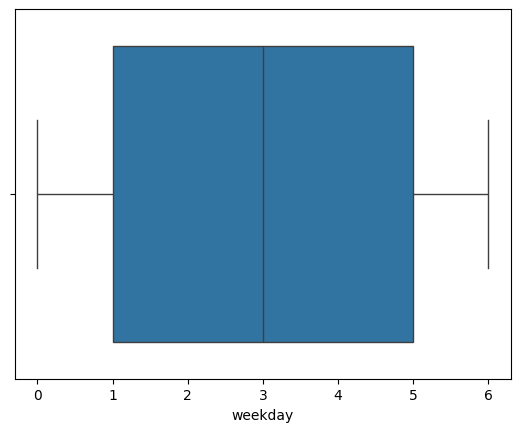

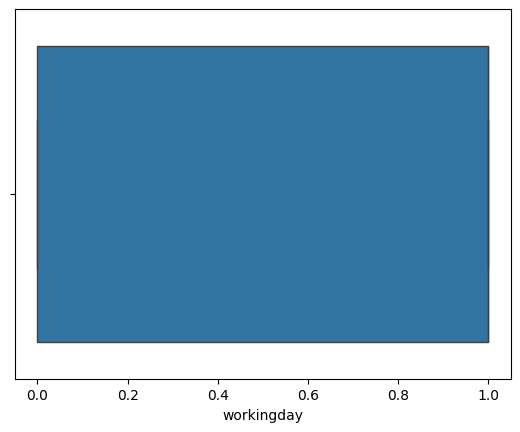

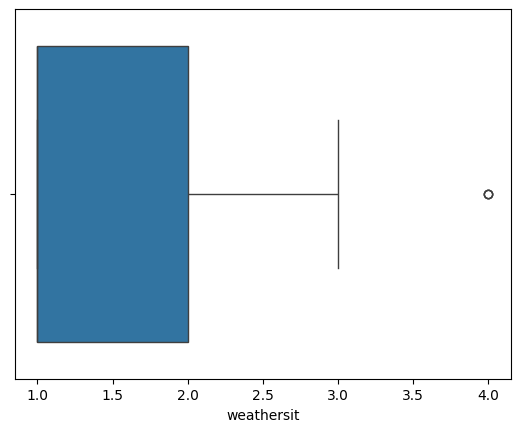

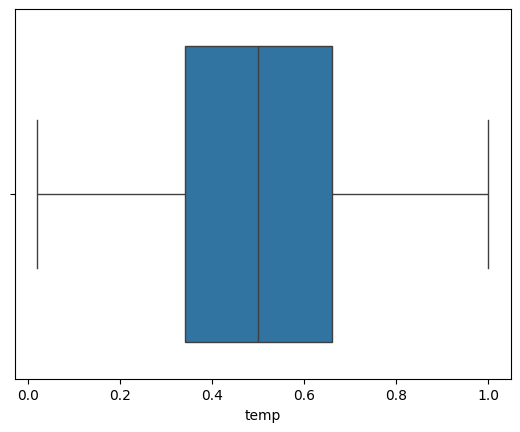

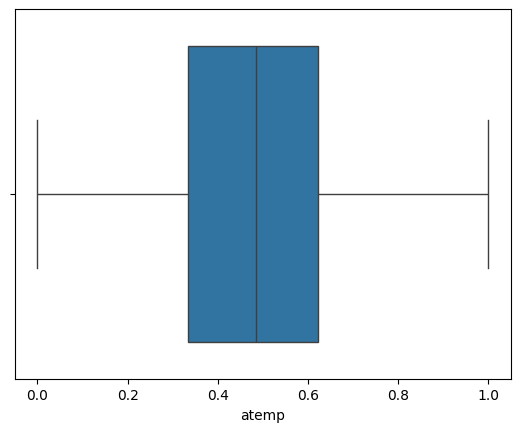

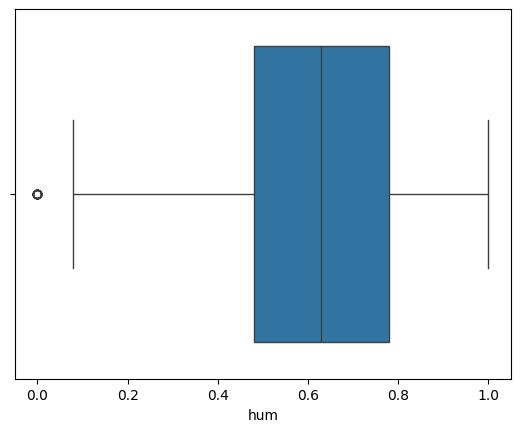

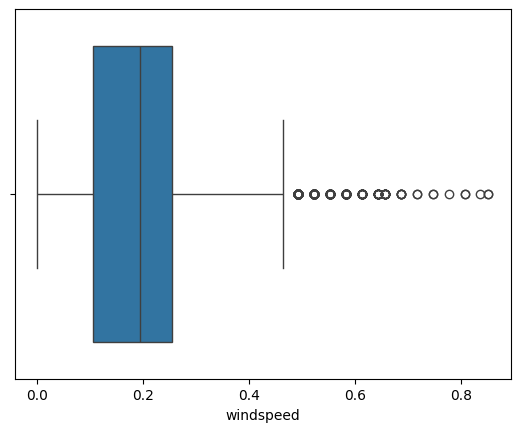

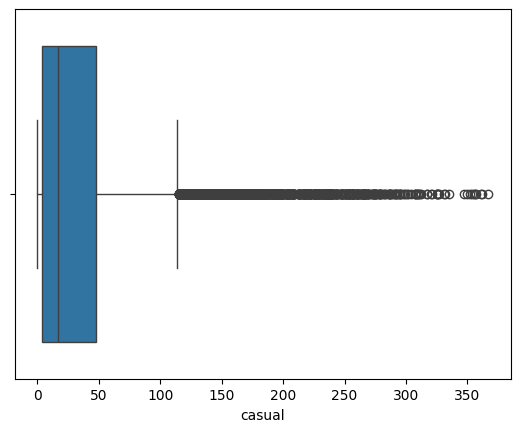

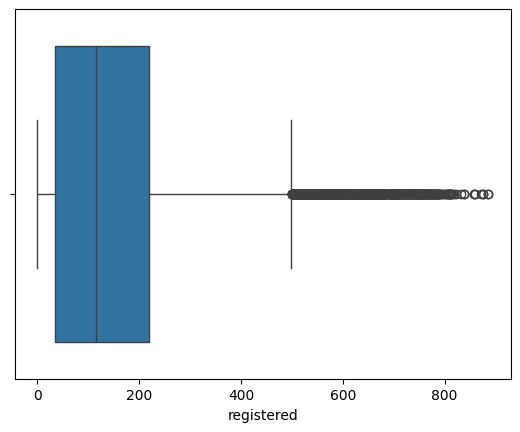

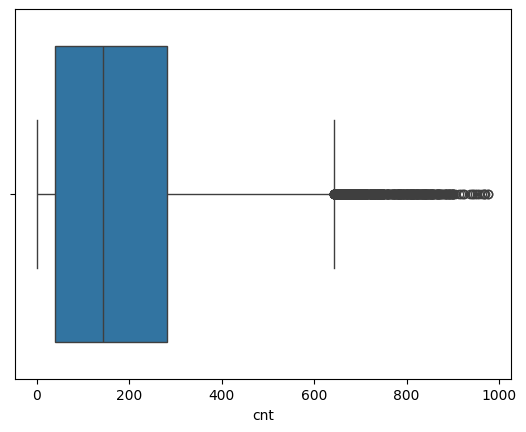

In [63]:
for column  in n_columns:
    sns.boxplot(data=df,x=column)
    plt.show()

In [64]:
def handling_outliers(df):
  for col in df.select_dtypes(include='number').columns:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    Lower_bound=Q1-1.5*IQR
    Upper_bound=Q3+1.5*IQR
    df[col]=df[col].apply(lambda x:Lower_bound if x<Lower_bound else Upper_bound if x>Upper_bound else x)
  return df

<Axes: >

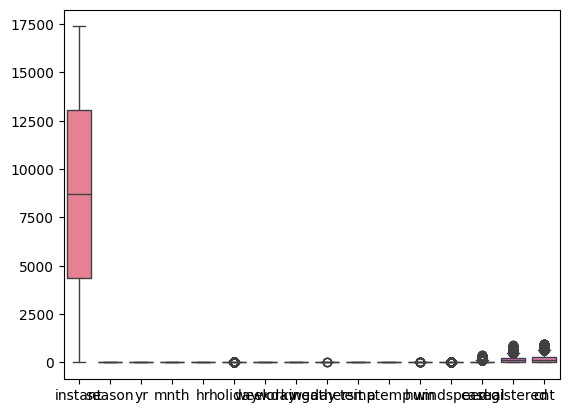

In [65]:
sns.boxplot(df)

# ✈ **VISUALIZATION**

**1) LINE PLOT**

In [66]:
x=df['hum']
x1=x.head(10)
y=df['temp']
y1=y.head(10)

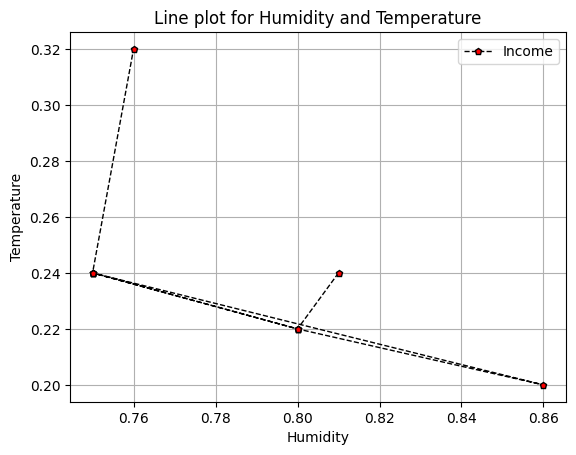

In [67]:
plt.plot(x1,y1,color='black',linestyle='--',linewidth=1,marker='p',markersize=5, label='Income',markerfacecolor='red')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.title('Line plot for Humidity and Temperature')
plt.legend()
plt.grid(True)
plt.show()

**2)BAR CHART**

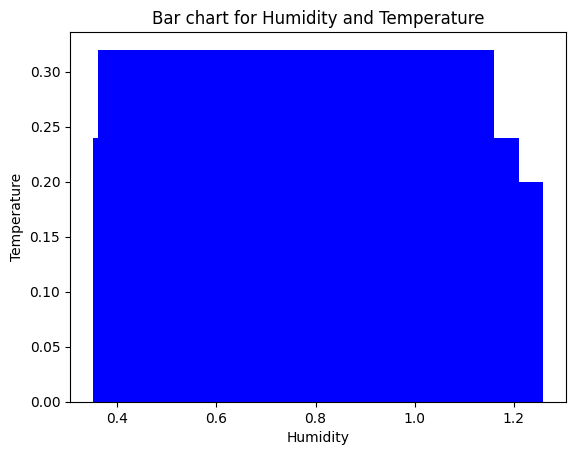

In [68]:
x=df['hum']
x1=x.head(10)
y=df['temp']
y1=y.head(10)
plt.bar(x1,y1,color='blue',label='Humidity')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.title('Bar chart for Humidity and Temperature')
plt.show()

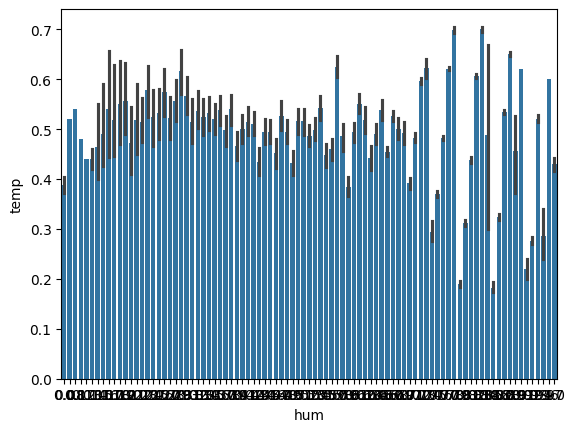

In [69]:
x=df['hum']
x1=x.head(5)
y=df['temp']
y1=y.head(5)
sns.barplot(data=df,x='hum',y='temp')
plt.show()

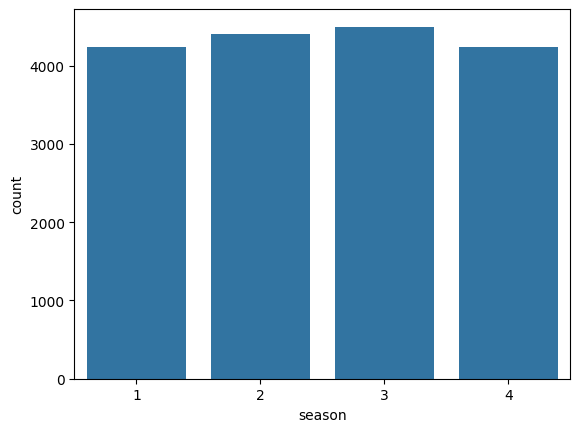

In [70]:
sns.countplot(data=df,x='season')
plt.show()

**3)HISTOGRAM**

Text(0.5, 1.0, 'Histogram for Humidity')

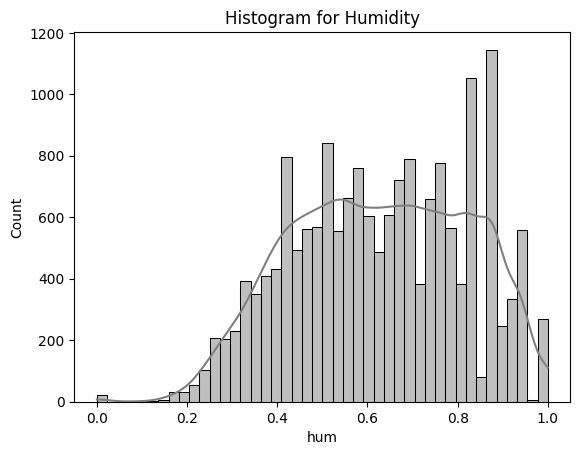

In [71]:
sns.histplot(data=df,x='hum',kde=True,color='gray')
plt.title("Histogram for Humidity")

**4)SCATTER PLOT**

In [72]:
x=df['hum']
x1=x.head(100)
y=df['temp']
y1=y.head(100)

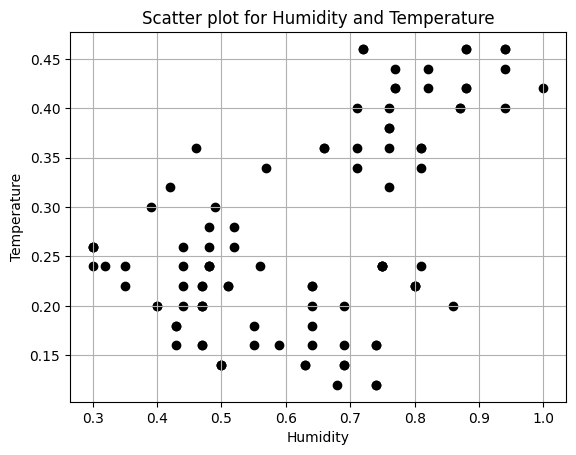

In [73]:
plt.scatter(x1,y1,color='black',label='Humidity')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.title('Scatter plot for Humidity and Temperature')
plt.grid(True)
plt.show()

**5) BOX PLOT**

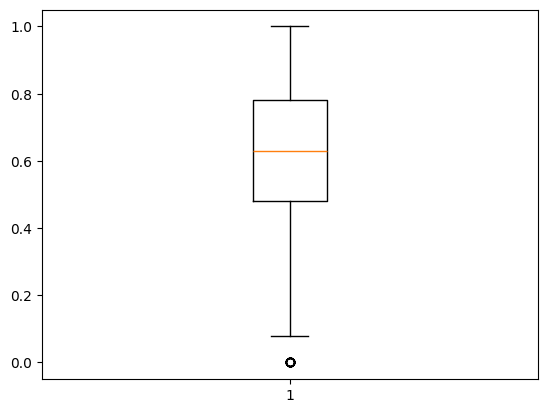

In [74]:
plt.boxplot(df['hum'])
plt.show()

6) **HEATMAP**

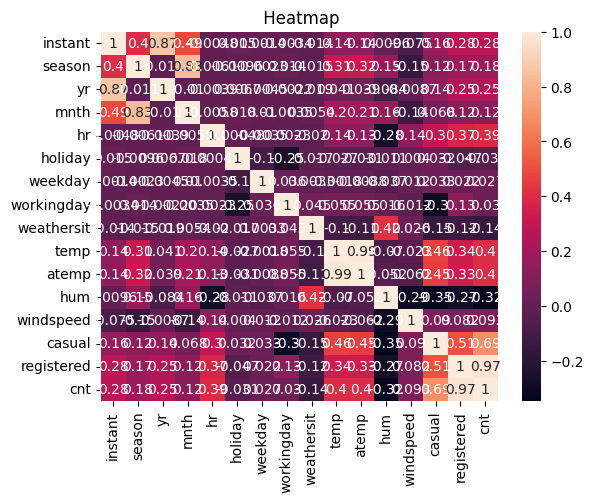

In [75]:
df['dteday'] = pd.to_datetime(df['dteday'])
n_features = df.select_dtypes(include=np.number).columns
correlation_matrix = df[n_features].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title(" Heatmap")
plt.show()

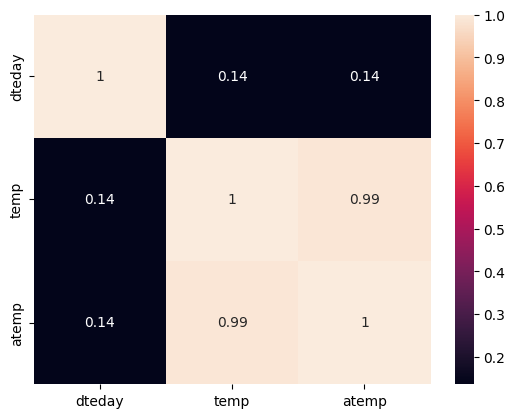

In [76]:
n=df[['dteday','temp','atemp']].corr()
sns.heatmap(n,annot=True)
plt.show()

# ✈ **Skewness**

In [77]:
df = df.drop('dteday', axis=1, errors='ignore')

In [78]:
df.skew()

,0
instant,0.000000
season,-0.005416
yr,-0.010243
mnth,-0.009253
hr,-0.010680
holiday,5.638538
weekday,-0.002998
workingday,-0.785258
weathersit,1.228047
temp,-0.006021


In [79]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
df=pd.DataFrame(pt.fit_transform(df),columns=df.columns)

In [80]:
pt=PowerTransformer(method='yeo-johnson')
df=pd.DataFrame(pt.fit_transform(df),columns=df.columns)

In [81]:
df.skew()

,0
instant,-0.054056
season,-0.026744
yr,-0.010243
mnth,-0.033828
hr,-0.046483
holiday,5.638538
weekday,-0.039833
workingday,-0.785258
weathersit,0.661735
temp,-0.000289


# ✈ **FEATURE SELECTION**

In [82]:
x=df.drop('cnt',axis=1)
y=df['cnt']

In [83]:
from sklearn.feature_selection import SelectKBest,f_classif

In [84]:
selecter=SelectKBest(score_func=f_classif,k=10)
x_new=selecter.fit_transform(x,y)
selected_features=x.columns[selecter.get_support()]
feature_score=pd.DataFrame({'Feature':x.columns,'Score':selecter.scores_}).sort_values(by='Score',ascending=False)
feature_score

,Feature,Score
14,registered,917.492860
13,casual,56.311630
4,hr,11.676510
9,temp,5.950499
10,atemp,5.858036
11,hum,3.913522
0,instant,2.794792
2,yr,2.322330
1,season,1.968958
7,workingday,1.407288


In [85]:
x_selected=x[selected_features]
x_selected.columns

Index(['instant', 'season', 'yr', 'hr', 'workingday', 'temp', 'atemp', 'hum',
       'casual', 'registered'],
      dtype='object')

# ✈ **SCALING**

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
Ss=StandardScaler()

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x_selected, y, test_size=0.2, random_state=42)
Ss = StandardScaler()
x_test_scaled = Ss.fit_transform(x_test)
x_train_scaled = Ss.fit_transform(x_train)

# ✈ **REGRESSION**:

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [92]:
print("\nTraining Models")
models={'Linear Regression':LinearRegression(),
        'SVR':SVR(),
        'Random Forest':RandomForestRegressor(random_state=42),
        'Decision Tree':DecisionTreeRegressor()}






Training Models


In [93]:
results={}
for name,model in models.items():
    model.fit(x_train_scaled,y_train)
    y_pred=model.predict(x_test_scaled)
    results[name]={'MAE': mean_absolute_error(y_test,y_pred),
               'MSE': mean_squared_error(y_test,y_pred),
               'RMSE': np.sqrt(mean_squared_error(y_test,y_pred)),
               'R2': r2_score(y_test,y_pred)}

In [94]:
# PRINTING MODEL PERFORMANCE

print("\nModel Performance:")
for model_name,metrics in results.items():
  print(f"\n{model_name}:")
  for metrics_name, value in metrics.items():
    print(f"{metrics_name}:{value:.4f}")


Model Performance:

Linear Regression:
MAE:0.0575
MSE:0.0048
RMSE:0.0695
R2:0.9950

SVR:
MAE:0.0505
MSE:0.0037
RMSE:0.0610
R2:0.9962

Random Forest:
MAE:0.0224
MSE:0.0009
RMSE:0.0292
R2:0.9991

Decision Tree:
MAE:0.0236
MSE:0.0011
RMSE:0.0337
R2:0.9988
